In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.special import gamma
%matplotlib inline

# Volume of the hypersphere
The volume of the hypersphere of dimension $d$ and radius $R$ is
$$V_{d}(R) = \frac{(\sqrt\pi R)^d}{\Gamma(d/2 + 1)}$$

We can express this formula specifically for $d$ even or odd.
The volume of the hypersphere of dimension $d=2k$ is
$$V_{2k}(R) = \frac{\pi^k}{k!}R^{2k}$$
and the volume of the hypersphere of dimension $d=2k+1$ is
$$V_{2k+1}(R) = \frac{2^{k+1}\pi^k}{(2k+1)(2k-1)\dots 5.3.1}R^{2k}$$

In [3]:
rtpi = np.sqrt(np.pi)

def volsphere(d,r):
    return (rtpi*r)**d / gamma(d/2 + 1)

In [51]:
dd = np.arange(1,100)
rr = np.linspace(0.01,5,100)
DD, RR = np.meshgrid(dd,rr)
vols = volsphere(DD,RR)

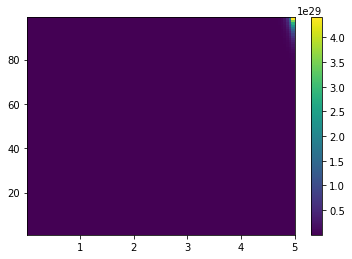

In [52]:
plt.pcolormesh(RR,DD,vols)
plt.colorbar()

This plot is quite uninteresting. Even in log scale, the range covered by the function explodes. The problem is that it's really not comparable between dimensions. For each dimension, eg each line of the picture, the function f the radius is a polynomial of order $d$.

I want to renormalize it radius-wise so that for each radius I can clearly see the dimension of maximum volume. Ideally I would see the crest line of maximums. I am simply gonna divide by the maximum volume reached for a given radius.

In [53]:
print(vols.shape)
maxvols = np.amax(vols,axis=1)
print(maxvols.shape)
normvols = vols/maxvols[:,np.newaxis]

(100, 99)
(100,)


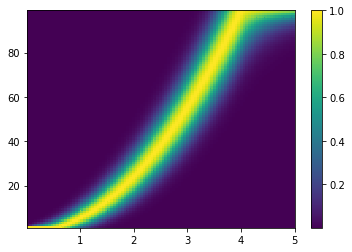

In [54]:
plt.pcolormesh(RR,DD,normvols)
plt.colorbar()

Now this is pretty. What is the equation of this line?